# K-NEAREST NEIGHBOURS

## IMPORTING LIBRARIES

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Task-1. Analyse the data using the visualizations

In [184]:
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [186]:
zoo.drop('animal name',axis=1,inplace=True)

In [188]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


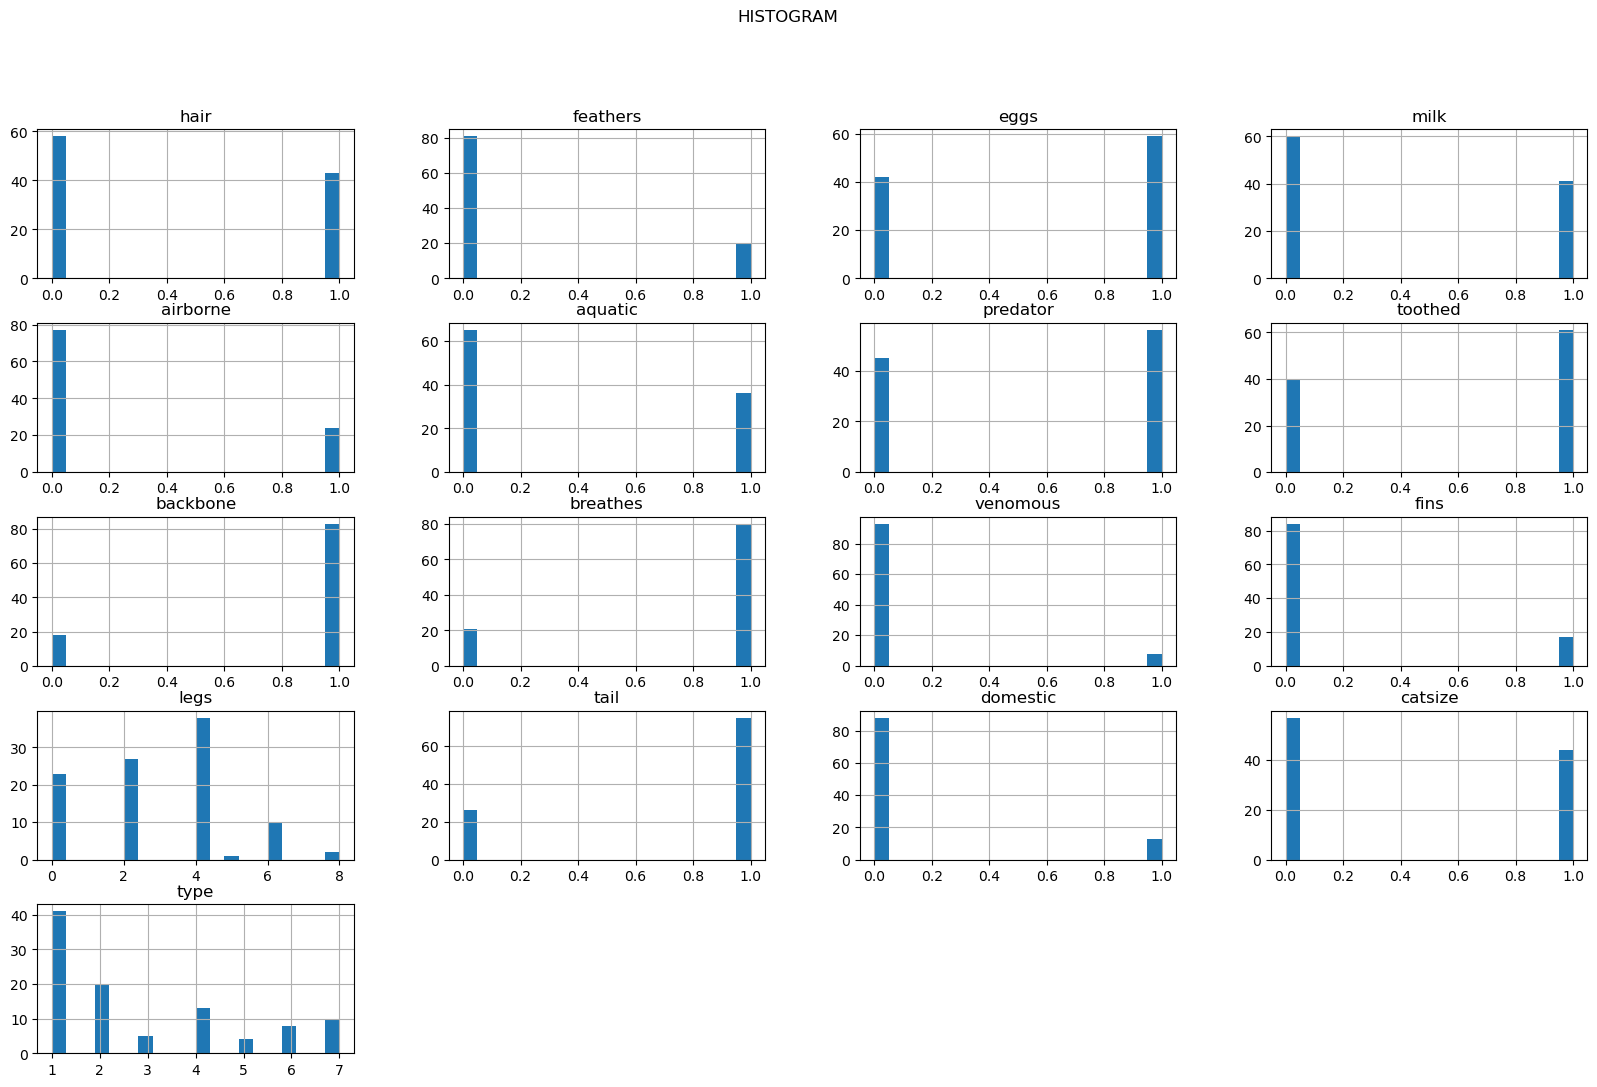

In [194]:
zoo.hist(bins=20,figsize=(20,12))
plt.suptitle('HISTOGRAM')
plt.show()

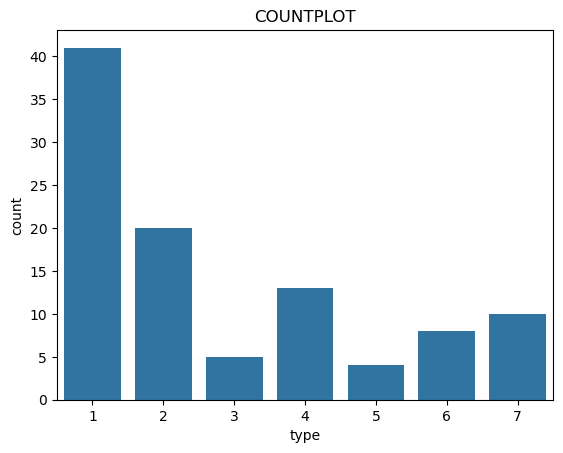

In [195]:
sns.countplot(x='type',data=zoo)
plt.title('COUNTPLOT')
plt.show()

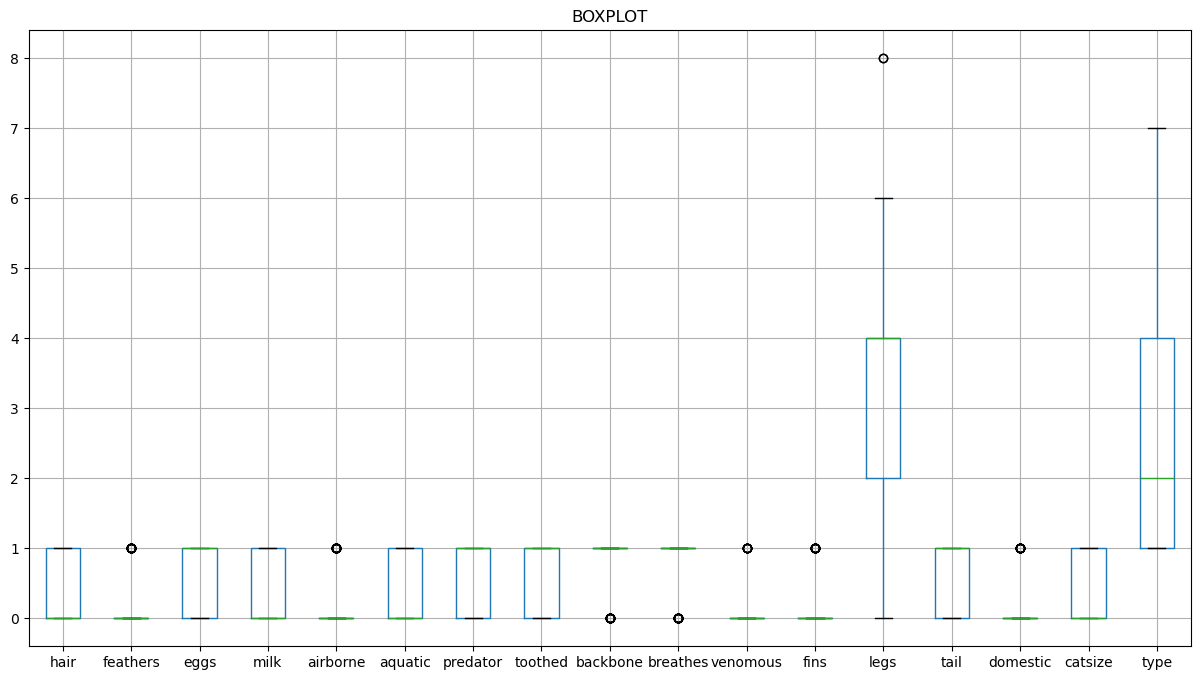

In [196]:
plt.figure(figsize=(15,8))
zoo.boxplot()
plt.title('BOXPLOT')
plt.show()

## Task-2. Preprocess the data by handling missing values & Outliers, if any.

In [201]:
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [203]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


##### THERE ARE NO MISSING VALUES IN THIS DATA

## Task-3. Split the dataset into training and testing sets (80% training, 20% testing).

In [207]:
features=zoo.drop(['type'],axis=1)
target=zoo['type']

In [209]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


## Task-4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [295]:
k=7
knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [297]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [299]:
y_preds=knn.predict(x_test)
y_preds

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 4, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [301]:
warnings.simplefilter('ignore')
acc=accuracy_score(y_test,y_preds)
cla=classification_report(y_test,y_preds)
print('ACCURACY:','\n',acc)
print('CLASSIFICATION REPORT:','\n',cla)

ACCURACY: 
 0.8571428571428571
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



## Task-5. Choose an appropriate distance metric and value for K.

In [304]:
params={
    'n_neighbors' : (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18),
    'metric' : ['euclidean', 'manhattan','minkowski']
}

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18)})

In [305]:
print('BEST SCORE:','\n',grid.best_score_)
print('BEST PARAMATERS:','\n',grid.best_params_)

BEST SCORE: 
 0.975
BEST PARAMATERS: 
 {'metric': 'euclidean', 'n_neighbors': 1}


## Task-6. Visualize the decision boundaries of the classifier.

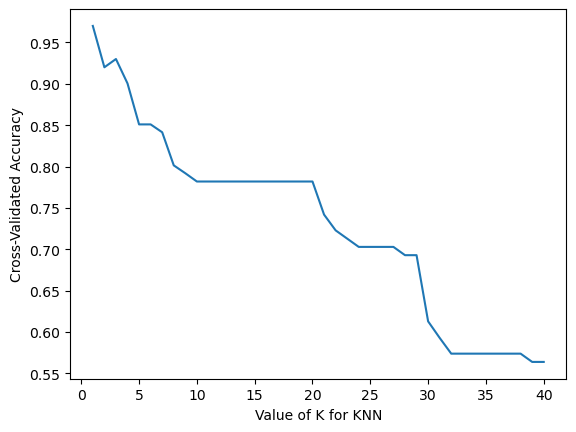

In [325]:
k_values = range(1,41)
k_scores = []

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,features,target)
    k_scores.append(scores.mean())
plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

##### Key Hyperparameters:
##### k: Number of neighbors.
##### Distance metric (e.g., Euclidean, Manhattan, Minkowski).
##### Weighting (uniform vs distance-weighted neighbors).

### 2. What distance metrics can be used in KNN?

###### EUCLIDEAN: sqrt of sum of square of (Xi-Yi)
###### MANHATTAN: sum of modulus of (Xi-Yi)
###### MINKOWSKI: Generalized form of Euclidean and Manhattan.